In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [63]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [64]:
DATA_PATH = Path("../data/gold/gold_data.csv")
df = pd.read_csv(DATA_PATH)

In [65]:
df.head()

,RA,IAA,IEG,IPS,math,portuguese,has_lag,IAA__minus_1,IEG__minus_1,IPS__minus_1,math__minus_1,portuguese__minus_1,has_lag__minus_1,IAA__minus_2,IEG__minus_2,IPS__minus_2,math__minus_2,portuguese__minus_2,has_lag__minus_2,years
0,RA-1,8.3,4.1,5.6,2.7,3.5,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,RA-2,8.8,5.2,6.3,6.3,4.5,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,RA-3,0.0,7.9,5.6,5.8,4.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,RA-4,8.8,4.5,5.6,2.8,3.5,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,RA-5,7.9,8.6,5.6,7.0,2.9,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [66]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RA                   1576 non-null   str    
 1   IAA                  1576 non-null   float64
 2   IEG                  1576 non-null   float64
 3   IPS                  1576 non-null   float64
 4   math                 1576 non-null   float64
 5   portuguese           1576 non-null   float64
 6   has_lag              1576 non-null   bool   
 7   IAA__minus_1         814 non-null    float64
 8   IEG__minus_1         814 non-null    float64
 9   IPS__minus_1         814 non-null    float64
 10  math__minus_1        814 non-null    float64
 11  portuguese__minus_1  814 non-null    float64
 12  has_lag__minus_1     814 non-null    object 
 13  IAA__minus_2         444 non-null    float64
 14  IEG__minus_2         444 non-null    float64
 15  IPS__minus_2         444 non-null    float64
 16 

In [67]:
df["years"].value_counts().sort_index()

years
1.0    752
2.0    380
3.0    444
Name: count, dtype: int64

In [68]:
df["has_lag"].value_counts()

has_lag
True     894
False    682
Name: count, dtype: int64

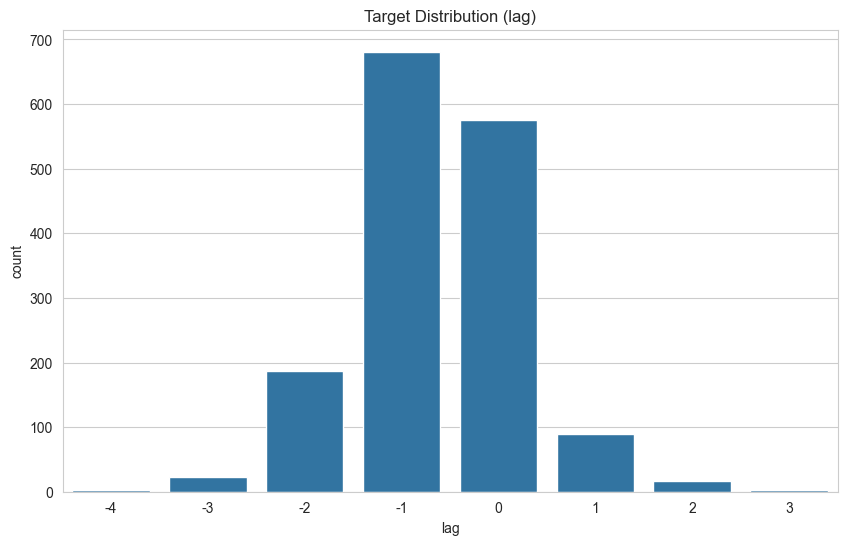

In [61]:
sns.countplot(x="lag", data=df)
plt.title("Target Distribution (lag)")
plt.show()

In [70]:
df["has_lag"].value_counts(normalize=True)

has_lag
True     0.567259
False    0.432741
Name: proportion, dtype: float64

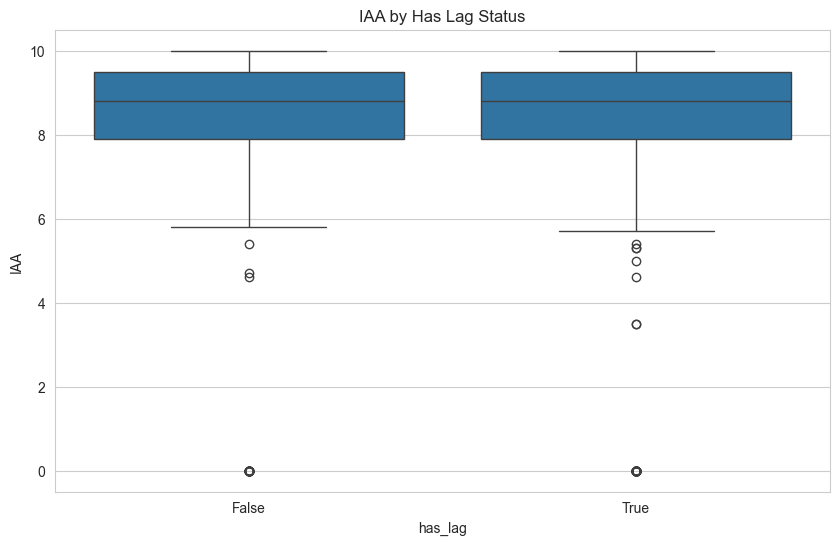

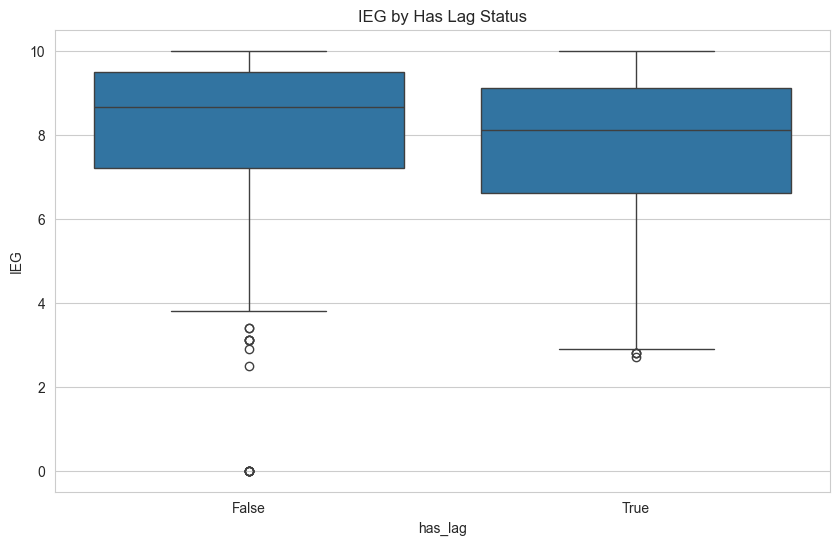

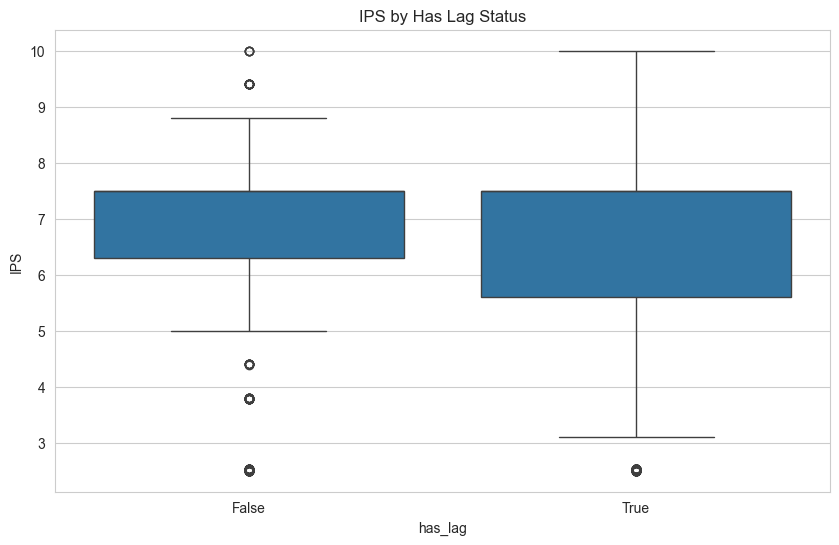

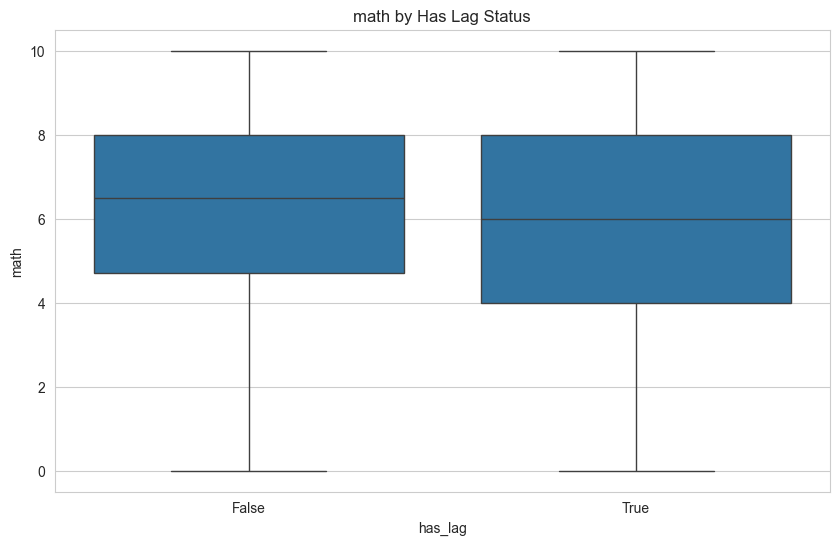

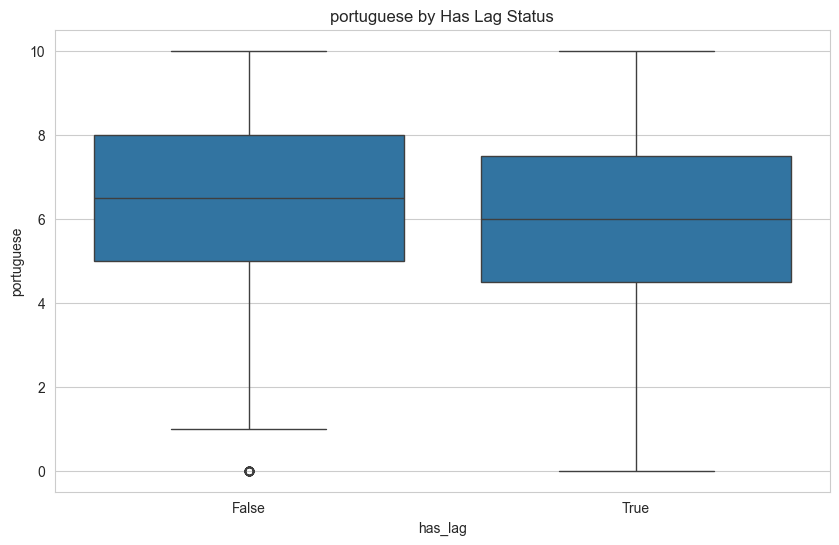

In [71]:
metrics = ["IAA", "IEG", "IPS", "math", "portuguese"]

for col in metrics:
    plt.figure()
    sns.boxplot(x="has_lag", y=col, data=df)
    plt.title(f"{col} by Has Lag Status")
    plt.show()

In [73]:
df.groupby("has_lag")[metrics].mean()

,IAA,IEG,IPS,math,portuguese
has_lag,,,,,
False,8.237537,8.154985,6.725513,6.214370,6.336804
True,8.062416,7.763870,6.452371,5.854474,5.856935


In [75]:
df.groupby("has_lag")[metrics].agg(["mean", "std"])

IAA                 IEG                 IPS                math  \
             mean       std      mean       std      mean       std      mean   
has_lag                                                                         
False    8.237537  2.126229  8.154985  1.768026  6.725513  1.605916  6.214370   
True     8.062416  2.370431  7.763870  1.706566  6.452371  1.644669  5.854474   

                  portuguese            
              std       mean       std  
has_lag                                 
False    2.631170   6.336804  2.367141  
True     2.647227   5.856935  2.277307

In [76]:
df_lag1 = df[df["years"] >= 2].copy()

for col in metrics:
    df_lag1[f"{col}_delta"] = (
        df_lag1[col] - df_lag1[f"{col}__minus_1"]
    )

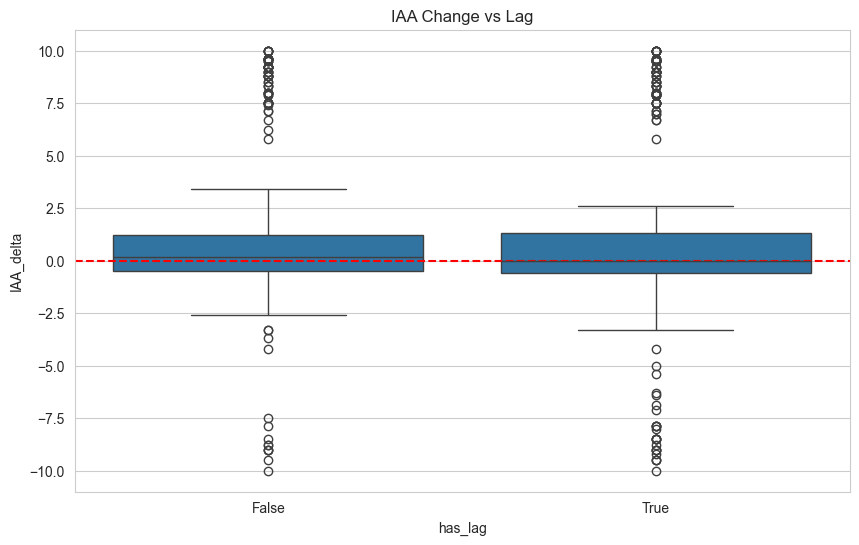

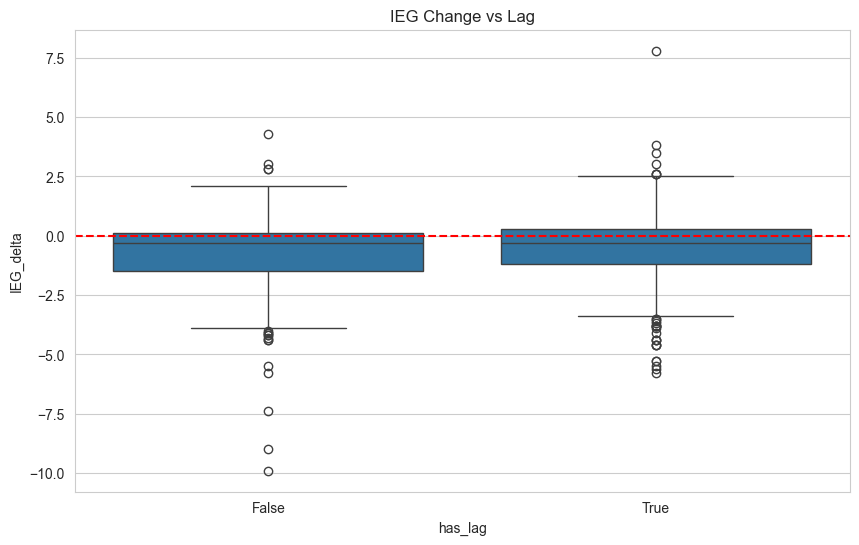

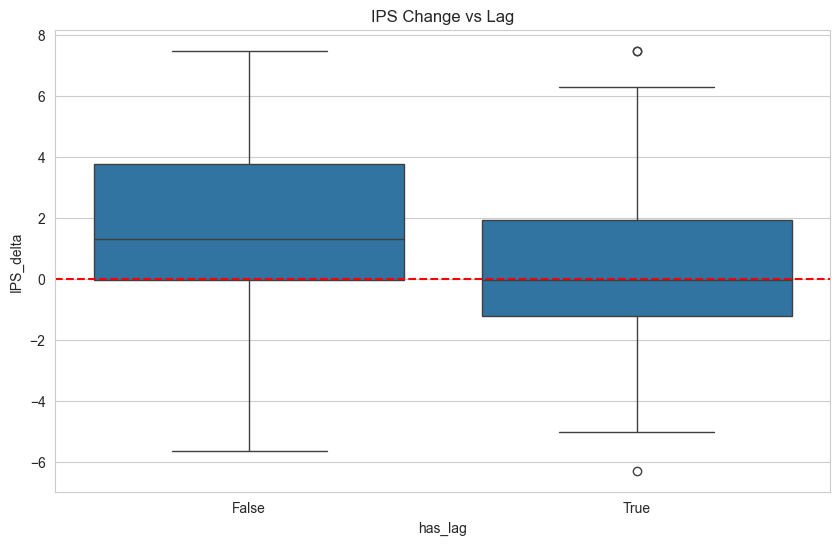

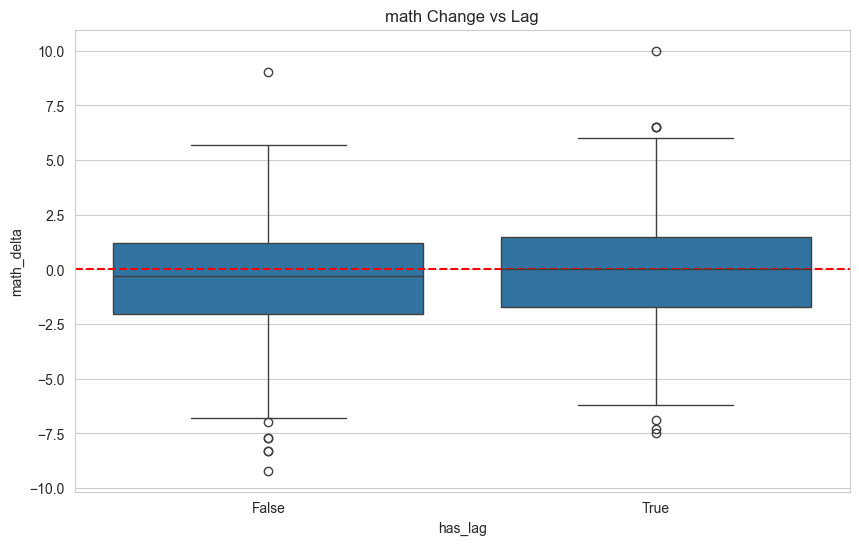

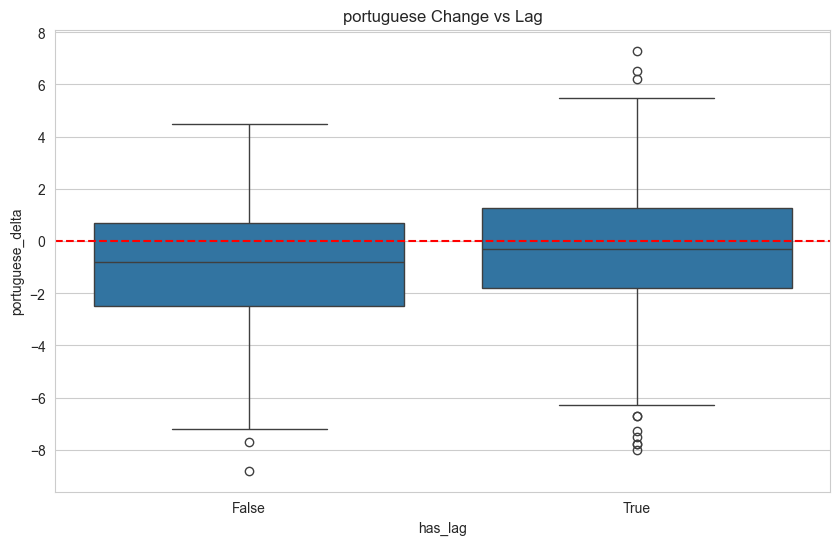

In [78]:
for col in metrics:
    plt.figure()
    sns.boxplot(x="has_lag", y=f"{col}_delta", data=df_lag1)
    plt.title(f"{col} Change vs Lag")
    plt.axhline(0, color="red", linestyle="--")
    plt.show()

In [81]:
df["had_lag_last_year"] = (df["has_lag__minus_1"] < 0).astype(float)

pd.crosstab(df["had_lag_last_year"], df["has_lag"], normalize="index")

has_lag,False,True
had_lag_last_year,,
0.0,0.432741,0.567259


In [82]:
pd.crosstab(df["years"], df["has_lag"], normalize="index")

has_lag,False,True
years,,
1.0,0.348404,0.651596
2.0,0.368421,0.631579
3.0,0.630631,0.369369


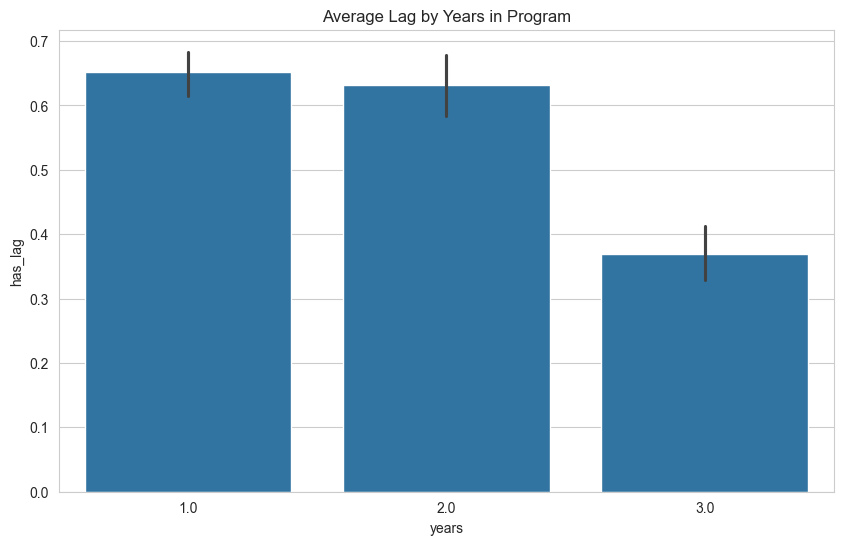

In [84]:
sns.barplot(x="years", y="has_lag", data=df)
plt.title("Average Lag by Years in Program")
plt.show()

In [86]:
numeric_df = df.drop(columns=["RA"])
corr = numeric_df.corr()

corr["has_lag"].sort_values()

IEG__minus_2          -0.334497
IEG__minus_1          -0.252098
portuguese__minus_1   -0.246527
years                 -0.228223
portuguese__minus_2   -0.215659
math__minus_1         -0.181907
math__minus_2         -0.181146
IEG                   -0.111168
portuguese            -0.102158
IPS__minus_2          -0.093926
IPS                   -0.082892
math                  -0.067424
IAA                   -0.038252
IAA__minus_2          -0.007776
IAA__minus_1          -0.006535
IPS__minus_1           0.176123
has_lag__minus_2       0.270395
has_lag__minus_1       0.332491
has_lag                1.000000
had_lag_last_year           NaN
Name: has_lag, dtype: float64

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = df.drop(columns=["RA", "has_lag"])
y = df["has_lag"]

X = X.fillna(0)

model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression())
])

model.fit(X, y)

coefs = pd.Series(
    model.named_steps["clf"].coef_[0],
    index=X.columns
).sort_values()

coefs

IEG__minus_2          -1.384904
portuguese__minus_1   -0.768758
IEG__minus_1          -0.257298
IPS__minus_2          -0.241875
IPS                   -0.156023
portuguese            -0.117469
IEG                   -0.062136
math__minus_2         -0.051301
IAA__minus_1          -0.041980
portuguese__minus_2   -0.041928
math__minus_1         -0.000455
had_lag_last_year      0.000000
math                   0.039076
IAA                    0.091305
years                  0.246356
has_lag__minus_2       0.298820
IPS__minus_1           0.478666
has_lag__minus_1       0.642639
IAA__minus_2           0.789856
dtype: float64

Higher past performance → much lower risk of lag.